# Hackathon Stat

This project illustrates the course LEPL1109 with an industrial application of statistics. You will analyse the capacity of solar production of electricity located in the French cities of Caen and Tours.
The file 'radiation.csv' contains 3 columns 
DATE           : YYYYMMDD,
Caen and Tours : the daily solar radiation in W/m2 measured in the 2 cities. 
Notice that data for some days are not reported due to failure of measurement system.

## Report content

•	You have to fill in this  jupyter notebook downloadable on the moodle website of the course

•	Grades are granted to the members whose names are in the Jupyter notebook. If your name doesn’t appear on the top of the notebook, you’ll get a 0, even though you are in a group on Moodle.

•	The jupyter notebook must be compiled with printed results and next submitted via moodle. The absence of compiled results (or non-printed values) leads to a lower grade.

## Report submission

•	The deadline for submission is reported on the moodle website. Submission after the deadline will not be accepted.

•	To submit your report, go to the section “APP” on Moodle and the subsection “Soumission du rapport”. You can upload your work there. Once you are sure that it is your final version, click the button “Envoyer le devoir”. It is important that you don’t forget to click on this button ! 

•	Reports that have not been uploaded through Moodle will not be corrected.

## Names and Noma of participants:

Part. 1: Xavier Sanchez-Rivas (16171800)

Part. 2: Hugo Wouters

Part. 3: Loys Collard-Bovy

Part. 4: Sébastien Navez

---
## 1. Energy calculation and basic statistics

Compute the daily energy in WH per square meter of solar panel. For this purpose you use the datasets reporting the solar irradation measure in Caen and Tours (source https://www.ecad.eu/). The irradiation is measured in W/m2 per day. You will use the formula:

C = E_Sol x 24 x P_cr x f_perf

where  

C is the electricity produced in WH/m2 for a day

E_sol is the daily solar radiation in W/m2 

P_cr is the peak power coefficient, set here to  0.18 (monocristal silicium)

f_perf depends upon the system, set here to 0.75.

Remark:

1 W = 1 J/sec

1 WH  is 1W x 3600sec = 3600J

energy/m2 = E_sol * 24 * 3600 J/m2 = E_sol * 24 WH/m2

---
1.1. Start by computing the daily energy in WH produced by a 1m2 solar panel

a. Plot time-series of solar electric production in Caen and Tours from 1974 to 2023. Comment the evolution.

b. Plot boxplots of daily productions for both cities. Comment the box plot.

c. Remove outliers using the interquartile range. 

d. Plot an histogram of daily electricity production, after removal of outliers.

Watchout: remove all days for which a outlier is observed in Caen **or** Tours to keep the same number of observations.


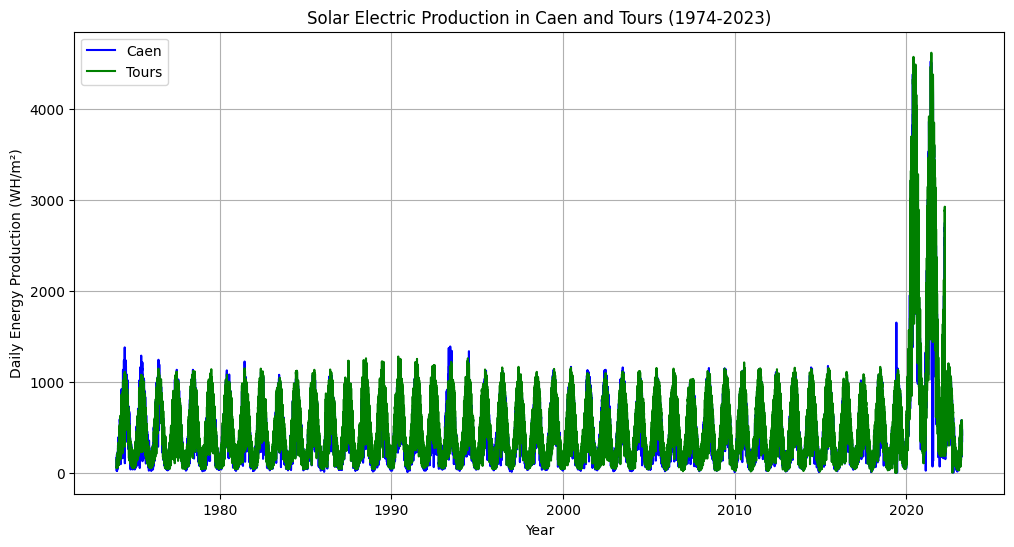

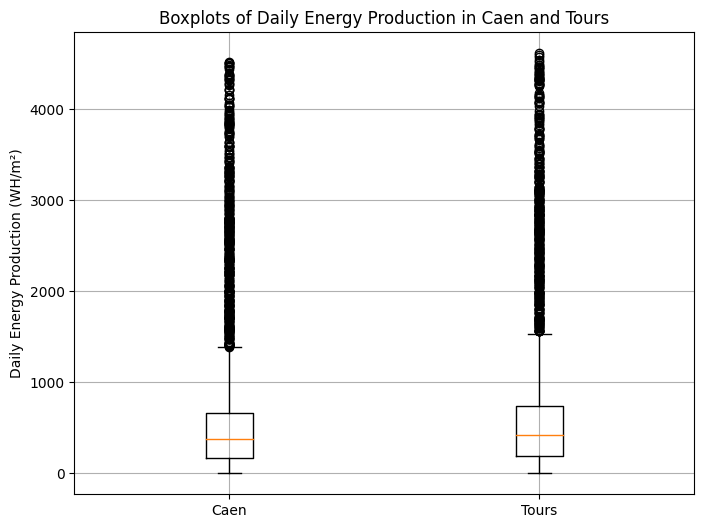

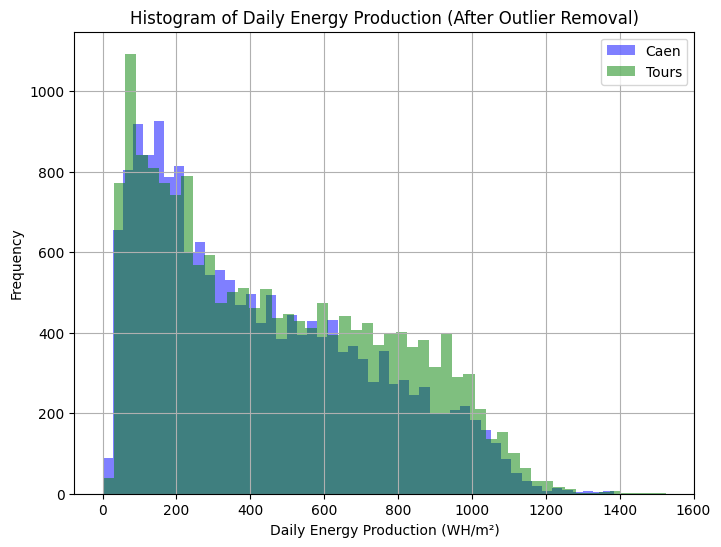

In [2]:
#code here
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from 'radiation.csv' into a DataFrame
data = pd.read_csv("Radiation.csv")

# Calculate daily energy production for each city
P_cr = 0.18  # Peak power coefficient
f_perf = 0.75  # Performance factor
data['Energy_Caen'] = data['Caen'] * 24 * P_cr * f_perf
data['Energy_Tours'] = data['Tours'] * 24 * P_cr * f_perf

# Plot time-series of solar electric production from 1974 to 2023
data['DATE'] = pd.to_datetime(data['DATE'], format='%Y%m%d')
plt.figure(figsize=(12, 6))
plt.plot(data['DATE'], data['Energy_Caen'], label='Caen', color='blue')
plt.plot(data['DATE'], data['Energy_Tours'], label='Tours', color='green')
plt.xlabel('Year')
plt.ylabel('Daily Energy Production (WH/m²)')
plt.title('Solar Electric Production in Caen and Tours (1974-2023)')
plt.legend()
plt.grid()
plt.show()

# Create boxplots of daily production for both cities
plt.figure(figsize=(8, 6))
plt.boxplot([data['Energy_Caen'], data['Energy_Tours']], labels=['Caen', 'Tours'])
plt.ylabel('Daily Energy Production (WH/m²)')
plt.title('Boxplots of Daily Energy Production in Caen and Tours')
plt.grid()
plt.show()

# Remove outliers using the interquartile range (IQR)
Q1_Caen = data['Energy_Caen'].quantile(0.25)
Q3_Caen = data['Energy_Caen'].quantile(0.75)
IQR_Caen = Q3_Caen - Q1_Caen
lower_bound_Caen = Q1_Caen - 1.5 * IQR_Caen
upper_bound_Caen = Q3_Caen + 1.5 * IQR_Caen

Q1_Tours = data['Energy_Tours'].quantile(0.25)
Q3_Tours = data['Energy_Tours'].quantile(0.75)
IQR_Tours = Q3_Tours - Q1_Tours
lower_bound_Tours = Q1_Tours - 1.5 * IQR_Tours
upper_bound_Tours = Q3_Tours + 1.5 * IQR_Tours

data_no_outliers = data[(data['Energy_Caen'] >= lower_bound_Caen) & (data['Energy_Caen'] <= upper_bound_Caen)
                        & (data['Energy_Tours'] >= lower_bound_Tours) & (data['Energy_Tours'] <= upper_bound_Tours)]

# Plot a histogram of daily electricity production after removing outliers
plt.figure(figsize=(8, 6))
plt.hist(data_no_outliers['Energy_Caen'], bins=50, alpha=0.5, label='Caen', color='blue')
plt.hist(data_no_outliers['Energy_Tours'], bins=50, alpha=0.5, label='Tours', color='green')
plt.xlabel('Daily Energy Production (WH/m²)')
plt.ylabel('Frequency')
plt.title('Histogram of Daily Energy Production (After Outlier Removal)')
plt.legend()
plt.grid()
plt.show()


---
1.2. We want to compute monthly statistics of electricity solar production. Calculate for each city and for each month: 

1) the average daily production of electricity in Wh/m2

2) the median daily production of electricity in Wh/m2

3) the standard deviation daily production of electricity in Wh/m2

4) the 5% percentile of daily production of electricity in Wh/m2

5) the 95% percentile of daily production of electricity in Wh/m2

Report the results in one or two tables. 

Compare and comment these statistics!

In [3]:
#code here
import pandas as pd

# Load the data from 'radiation.csv' into a DataFrame
data = pd.read_csv('Radiation.csv')

# Calculate daily energy production for each city
P_cr = 0.18  # Peak power coefficient
f_perf = 0.75  # Performance factor
data['Energy_Caen'] = data['Caen'] * 24 * P_cr * f_perf
data['Energy_Tours'] = data['Tours'] * 24 * P_cr * f_perf

# Convert the 'DATE' column to a datetime format
data['DATE'] = pd.to_datetime(data['DATE'], format='%Y%m%d')

# Group the data by city and month
data['Year'] = data['DATE'].dt.year
data['Month'] = data['DATE'].dt.month
grouped_data = data.groupby(['Year', 'Month'])

# Define a function to calculate the requested statistics
def calculate_statistics(series):
    return {
        'Average': series.mean(),
        'Median': series.median(),
        'Std Dev': series.std(),
        '5th Percentile': series.quantile(0.05),
        '95th Percentile': series.quantile(0.95)
    }

# Calculate the statistics for each city and month
statistics_Caen = grouped_data['Energy_Caen'].agg(calculate_statistics)
statistics_Tours = grouped_data['Energy_Tours'].agg(calculate_statistics)

# Report the results in tables
print("Statistics for Caen:")
print(statistics_Caen)

print("\nStatistics for Tours:")
print(statistics_Tours)


Statistics for Caen:
Year  Month
1974  1        {'Average': 129.28645161290322, 'Median': 126....
      2        {'Average': 246.70285714285714, 'Median': 236....
      3        {'Average': 388.8, 'Median': 447.12, 'Std Dev'...
      4        {'Average': 615.9240000000002, 'Median': 581.5...
      5        {'Average': 745.8270967741935, 'Median': 751.6...
                                     ...                        
2022  11       {'Average': 169.26206896551722, 'Median': 165....
      12       {'Average': 94.48258064516129, 'Median': 93.96...
2023  1        {'Average': 125.00129032258064, 'Median': 116....
      2        {'Average': 262.6714285714285, 'Median': 246.2...
      3        {'Average': 360.0580645161291, 'Median': 382.3...
Name: Energy_Caen, Length: 589, dtype: object

Statistics for Tours:
Year  Month
1974  1        {'Average': 132.6309677419355, 'Median': 110.1...
      2        {'Average': 245.54571428571424, 'Median': 244....
      3        {'Average': 367.4842105263

---
## 2. Fit of distributions and hypothesis tests

---
2.1. We focus on the daily production of electricity in April. Retrieve the data for month of April, in Caen and Tours. 

 1) Fit Gamma and normal distributions by log-likelihood maximization to 
    daily production of electricity during April (Caen & Tours).
    
 2) Compute the 4 log-likelihoods and select the best model for each location (justify your answer).
 
 3) Compare on the same plot the empirical, the  gamma and normal pdf (the
    empirical pdf is an histogram of frequencies).
    
 4) Why is there 3 parameters in python for the Gamma pdf whereas there
    is only 2 in the distribution seen during lectures? 

Remark : set floc to -0.001 for the gamma.fit (to avoid troubles in case of null observations)


/home/xavier/.local/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/xavier/.local/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/xavier/.local/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/xavier/.local/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/xavier/.local/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/xavier/.local/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


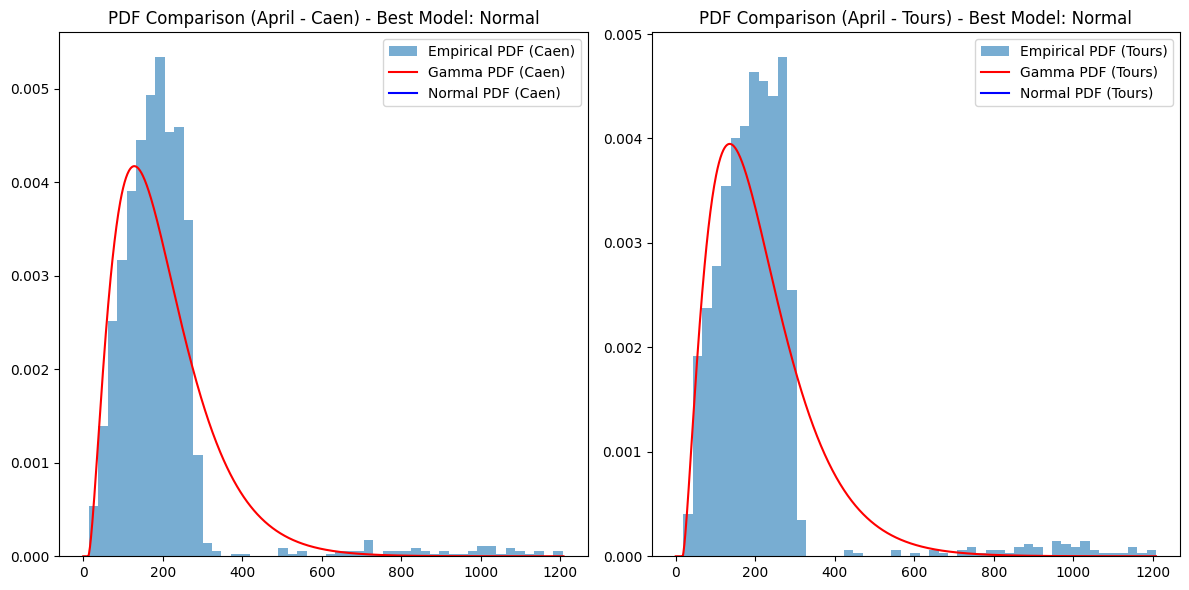

In [7]:
#code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, gamma
from scipy.optimize import minimize

# Load the data from 'radiation.csv' into a DataFrame
data = pd.read_csv('Radiation.csv')

# Convert the 'DATE' column to a datetime format
data['DATE'] = pd.to_datetime(data['DATE'], format='%Y%m%d')

# Extract data for April in Caen and Tours
data_april_Caen = data[(data['DATE'].dt.month == 4) & (data['Caen'].notna())]
data_april_Tours = data[(data['DATE'].dt.month == 4) & (data['Tours'].notna())]

# Define the log-likelihood functions for the gamma and normal distributions
def log_likelihood_gamma(params, data):
    shape, loc, scale = params
    return -np.sum(gamma.logpdf(data, a=shape, loc=loc, scale=scale))

def log_likelihood_normal(params, data):
    mean, std = params
    return -np.sum(norm.logpdf(data, loc=mean, scale=std))

# Fit gamma and normal distributions to the data and compute log-likelihoods
initial_guess = [2, 0, 1]  # Initial guess for gamma parameters (shape, loc, scale)
params_Caen_gamma = minimize(log_likelihood_gamma, initial_guess, args=(data_april_Caen['Caen']), method='BFGS').x
params_Caen_normal = minimize(log_likelihood_normal, [0, 1], args=(data_april_Caen['Caen'])).x

params_Tours_gamma = minimize(log_likelihood_gamma, initial_guess, args=(data_april_Tours['Tours']), method='BFGS').x
params_Tours_normal = minimize(log_likelihood_normal, [0, 1], args=(data_april_Tours['Tours'])).x

# Calculate log-likelihoods
log_likelihood_Caen_gamma = -log_likelihood_gamma(params_Caen_gamma, data_april_Caen['Caen'])
log_likelihood_Caen_normal = -log_likelihood_normal(params_Caen_normal, data_april_Caen['Caen'])
log_likelihood_Tours_gamma = -log_likelihood_gamma(params_Tours_gamma, data_april_Tours['Tours'])
log_likelihood_Tours_normal = -log_likelihood_normal(params_Tours_normal, data_april_Tours['Tours'])

# Compare the log-likelihoods and select the best model for each location
best_model_Caen = "Gamma" if log_likelihood_Caen_gamma > log_likelihood_Caen_normal else "Normal"
best_model_Tours = "Gamma" if log_likelihood_Tours_gamma > log_likelihood_Tours_normal else "Normal"

# Create histograms for empirical PDF
hist_Caen, bins_Caen = np.histogram(data_april_Caen['Caen'], bins=50, density=True)
hist_Tours, bins_Tours = np.histogram(data_april_Tours['Tours'], bins=50, density=True)

# Plot the empirical, gamma, and normal PDFs
x = np.linspace(0, max(data_april_Caen['Caen'].max(), data_april_Tours['Tours'].max()), 1000)
pdf_Caen_gamma = gamma.pdf(x, a=params_Caen_gamma[0], loc=params_Caen_gamma[1], scale=params_Caen_gamma[2])
pdf_Caen_normal = norm.pdf(x, loc=params_Caen_normal[0], scale=params_Caen_normal[1])

pdf_Tours_gamma = gamma.pdf(x, a=params_Tours_gamma[0], loc=params_Tours_gamma[1], scale=params_Tours_gamma[2])
pdf_Tours_normal = norm.pdf(x, loc=params_Tours_normal[0], scale=params_Tours_normal[1])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(data_april_Caen['Caen'], bins=50, density=True, alpha=0.6, label='Empirical PDF (Caen)')
plt.plot(x, pdf_Caen_gamma, label='Gamma PDF (Caen)', color='red')
plt.plot(x, pdf_Caen_normal, label='Normal PDF (Caen)', color='blue')
plt.title(f'PDF Comparison (April - Caen) - Best Model: {best_model_Caen}')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(data_april_Tours['Tours'], bins=50, density=True, alpha=0.6, label='Empirical PDF (Tours)')
plt.plot(x, pdf_Tours_gamma, label='Gamma PDF (Tours)', color='red')
plt.plot(x, pdf_Tours_normal, label='Normal PDF (Tours)', color='blue')
plt.title(f'PDF Comparison (April - Tours) - Best Model: {best_model_Tours}')
plt.legend()

plt.tight_layout()
plt.show()


---

2.2. Check if the average daily production in April is the same in Caen and Tours. Let us recall that the null hypothesis is

$H_0$: $\mu_{Caen} = \mu_{Tours}$.

Take care to comment your conclusions. Are all assumptions required to perform this test sastisfied?

In [10]:
import pandas as pd
from scipy.stats import ttest_ind, shapiro, levene

# Load the data from 'Radiation.csv' into a DataFrame
data = pd.read_csv('Radiation.csv')

# Convert the 'DATE' column to a datetime format
data['DATE'] = pd.to_datetime(data['DATE'], format='%Y%m%d')

# Extract the data for April in Caen and Tours
data_april_Caen = data[(data['DATE'].dt.month == 4) & (data['Caen'].notna())]['Caen']
data_april_Tours = data[(data['DATE'].dt.month == 4) & (data['Tours'].notna())]['Tours']

# Perform the Shapiro-Wilk normality test for both groups
shapiro_Caen = shapiro(data_april_Caen)
shapiro_Tours = shapiro(data_april_Tours)

# Perform Levene's test for equality of variances
levene_test = levene(data_april_Caen, data_april_Tours)

# Perform a two-sample t-test for equality of means
t_stat, p_value = ttest_ind(data_april_Caen, data_april_Tours)

# Print the results
print(f"Shapiro-Wilk normality test - Caen: Statistic = {shapiro_Caen[0]}, p-value = {shapiro_Caen[1]}")
print(f"Shapiro-Wilk normality test - Tours: Statistic = {shapiro_Tours[0]}, p-value = {shapiro_Tours[1]}")
print(f"Levene's test for equality of variances: Statistic = {levene_test.statistic}, p-value = {levene_test.pvalue}")
print(f"Two-sample t-test: t-statistic = {t_stat}, p-value = {p_value}")

# Check the assumptions and perform the t-test
if shapiro_Caen[1] > 0.05 and shapiro_Tours[1] > 0.05 and levene_test.pvalue > 0.05:
    print("Assumptions are satisfied.")
    if p_value > 0.05:
        print("There is no significant difference in the means (fail to reject H0).")
    else:
        print("There is a significant difference in the means (reject H0).")
else:
    print("Assumptions are not satisfied, and the t-test may not be valid.")


Shapiro-Wilk normality test - Caen: Statistic = 0.5974380970001221, p-value = 0.0
Shapiro-Wilk normality test - Tours: Statistic = 0.6084246635437012, p-value = 0.0
Levene's test for equality of variances: Statistic = 1.2299059477522136, p-value = 0.26751609949002597
Two-sample t-test: t-statistic = -2.349267142295982, p-value = 0.018876284109182444
Assumptions are not satisfied, and the t-test may not be valid.


---
2.3. Test the equality of variance of daily production in April at Caen & Tours?
$H_0$: $\sigma_{Caen}=\sigma_{Tours}$.


In [12]:
#code here
from scipy.stats import levene

# Extract the data for April in Caen and Tours
data_april_Caen = data[(data['DATE'].dt.month == 4) & (data['Caen'].notna())]['Caen']
data_april_Tours = data[(data['DATE'].dt.month == 4) & (data['Tours'].notna())]['Tours']

# Perform Levene's test for equality of variances
levene_test = levene(data_april_Caen, data_april_Tours)

# Print the results
print(f"Levene's test for equality of variances: Statistic = {levene_test.statistic}, p-value = {levene_test.pvalue}")

# Check the p-value to make a decision about the null hypothesis
if levene_test.pvalue > 0.05:
    print("There is no significant difference in variances (fail to reject H0).")
else:
    print("There is a significant difference in variances (reject H0).")


Levene's test for equality of variances: Statistic = 1.2299059477522136, p-value = 0.26751609949002597
There is no significant difference in variances (fail to reject H0).


---
2.4. Explain the Wilcoxon's test. What is the main advantage of this test compared to the Student's T test. Why is this useful in our project? 

In [ ]:
The Wilcoxon test is a non-parametric statistical test used to compare the distribution of paired data or two related groups. The main advantage of the Wilcoxon's test compared to the Student's t-test is that it does not assume that the data comes from a normal distribution, making it more robust when dealing with non-normally distributed data.

Wilcoxon's test is advantageous when we need to compare two related groups and cannot assume that your data follows a normal distribution. This robustness and flexibility make it a valuable tool for this project.

---
2.5. Apply the Wilcoxon test to distributions of daily productions in April, at Caen and Tours.  What can you conclude about the means of daily production in these 2 cities?


In [13]:
#code here
from scipy.stats import wilcoxon

# Extract the data for April in Caen and Tours
data_april_Caen = data[(data['DATE'].dt.month == 4) & (data['Caen'].notna())]['Caen']
data_april_Tours = data[(data['DATE'].dt.month == 4) & (data['Tours'].notna())]['Tours']

# Perform the Wilcoxon signed-rank test
wilcoxon_stat, p_value = wilcoxon(data_april_Caen, data_april_Tours, zero_method='wilcox')

# Print the results
print(f"Wilcoxon signed-rank test: Statistic = {wilcoxon_stat}, p-value = {p_value}")

# Interpret the results
if p_value > 0.05:
    print("There is no significant difference in the means (fail to reject H0).")
else:
    print("There is a significant difference in the means (reject H0).")


Wilcoxon signed-rank test: Statistic = 380928.0, p-value = 6.382836063402585e-21
There is a significant difference in the means (reject H0).


---
## 3. Regression and forecasting 

---
3.1. Do we observe any trend in the yearly solar production of electricity over the considered period?
To answer this question: 

a. You will compute the average daily production (Wh/m2) during April from 1977 up to 2019 (included).

b. You get a time-series of 44 values for each city. Regress these values on the explanatory
variables X=(Year-1977). Don't forget to add a constant term and analyze results. 

c. Plot on the same graph, the predicted and the observed values.

d. Comment your results! 


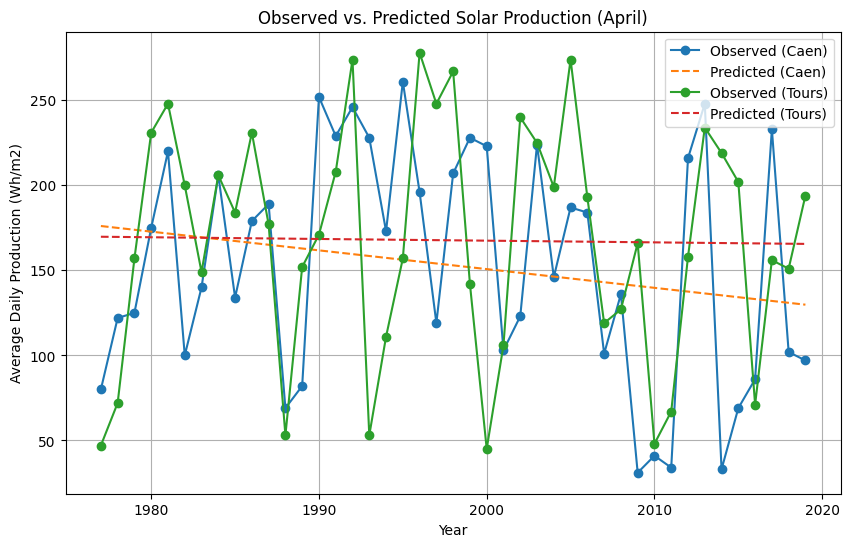

Regression Results for Caen:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     1.744
Date:                Sat, 21 Oct 2023   Prob (F-statistic):              0.194
Time:                        23:48:33   Log-Likelihood:                -241.35
No. Observations:                  43   AIC:                             486.7
Df Residuals:                      41   BIC:                             490.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        176.0846  

In [17]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the data from 'radiation.csv' into a DataFrame
data = pd.read_csv('Radiation.csv')

# Convert the 'DATE' column to a datetime data type
data['DATE'] = pd.to_datetime(data['DATE'], format='%Y%m%d')

# Extract data for April from 1977 to 2019 for each city
start_year = 1977
end_year = 2019
data_april_Caen = data[(data['DATE'].dt.month == 4) & (data['DATE'].dt.year >= start_year) & (data['DATE'].dt.year <= end_year)]['Caen']
data_april_Tours = data[(data['DATE'].dt.month == 4) & (data['DATE'].dt.year >= start_year) & (data['DATE'].dt.year <= end_year)]['Tours']

# Create a DataFrame with the data for regression
years = np.arange(start_year, end_year + 1)
X = sm.add_constant(years - start_year)

# Ensure that the lengths of y_Caen and y_Tours match the length of years
y_Caen = data_april_Caen.values[:len(years)]
y_Tours = data_april_Tours.values[:len(years)]

# Perform linear regression
model_Caen = sm.OLS(y_Caen, X).fit()
model_Tours = sm.OLS(y_Tours, X).fit()

# Predict the values based on the regression models
predicted_Caen = model_Caen.predict(X)
predicted_Tours = model_Tours.predict(X)

# Plot the observed and predicted values for both cities
plt.figure(figsize=(10, 6))
plt.plot(years, y_Caen, label='Observed (Caen)', marker='o')
plt.plot(years, predicted_Caen, label='Predicted (Caen)', linestyle='--')
plt.plot(years, y_Tours, label='Observed (Tours)', marker='o')
plt.plot(years, predicted_Tours, label='Predicted (Tours)', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Average Daily Production (Wh/m2)')
plt.title('Observed vs. Predicted Solar Production (April)')
plt.legend()
plt.grid(True)
plt.show()

# Summary of regression results
print("Regression Results for Caen:")
print(model_Caen.summary())

print("\nRegression Results for Tours:")
print(model_Tours.summary())


---
3.2. You want to design a model to forecast the solar electric production for the next day (location Caen only). You will work with data over the period 1977 to 2019. 

Let us denote by C(t) the production on day 't'. The model that we want to fit is called autoregressive and is defined as follows:

$$C(t) = \sum_{k=1}^{10} a_k C(t-k) $$

This model is common in time-series analysis and predicts the production of the next day with the  recent observations.

a. Split the dataset into a training set (1977 to 2010 included) and a validation set (2011 to 2019 included).

b.	Estimate this model with statsmodels on the training set. 

c.	How would you judge the quality of the predictive model? (Analyze statistics reported by statsmodel)

d.	Compute the Mean Absolute Error (MAE) between predicted and real consumptions (on the training set).

In [20]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error

# Load the data from 'radiation.csv' into a DataFrame
data = pd.read_csv('Radiation.csv')

# Convert the 'DATE' column to a datetime data type
data['DATE'] = pd.to_datetime(data['DATE'], format='%Y%m%d')

# Extract data for Caen from 1977 to 2019
start_year = 1977
end_year = 2019
data_caen = data[(data['DATE'].dt.year >= start_year) & (data['DATE'].dt.year <= end_year)]['Caen']

# Split the dataset into a training set (1977 to 2010) and a validation set (2011 to 2019)
train_data = data_caen[data_caen.index.year <= 2010]
valid_data = data_caen[data_caen.index.year >= 2011]

# Create lag features for the autoregressive model
train_data_lagged = train_data.shift(1).dropna()

# Extract the year from the datetime index for train_data
train_data_years = train_data.index.year

# Split the training data into predictors (lagged values) and target
X_train = train_data_lagged.values
y_train = train_data[1:].values

# Add a constant term for the intercept
X_train = sm.add_constant(X_train)

# Fit the autoregressive model on the training set
model = sm.OLS(y_train, X_train).fit()

# Predict the values on the training set
y_pred = model.predict(X_train)

# Compute the Mean Absolute Error (MAE) between predicted and real consumptions
mae = mean_absolute_error(y_train, y_pred)

# Summary of regression results
print("Autoregressive Model Results:")
print(model.summary())

print(f"\nMean Absolute Error (MAE) on Training Set: {mae:.2f}")


AttributeError: 'Int64Index' object has no attribute 'year'

---
3.3. Use this model on the test set to forecast the electric daily production.

a. Compare on a graph, the forecast to  real consumptions on the given period. 

b. Plot the errors of prediction. Are they acceptable?

c. Compute the MAE on the test set and the $R^2$. Is the forecast reliable?

In [23]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load the data from 'radiation.csv' into a DataFrame
data = pd.read_csv('Radiation.csv')

# Convert the 'DATE' column to a datetime data type
data['DATE'] = pd.to_datetime(data['DATE'], format='%Y%m%d')

# Extract data for Caen from 1977 to 2019
start_year = 1977
end_year = 2019
data_caen = data[(data['DATE'].dt.year >= start_year) & (data['DATE'].dt.year <= end_year)]['Caen']

# Split the dataset into a training set (1977 to 2010) and a validation set (2011 to 2019)
train_data = data_caen[data_caen <= 2010]
valid_data = data_caen[data_caen >= 2011]

# Create lag features for the autoregressive model on the training set
train_data_lagged = train_data.shift(1).dropna()

# Reset the index for the validation set to extract the year
valid_data = valid_data.reset_index()

# Extract the year from the datetime index for valid_data
valid_data_years = valid_data['DATE'].dt.year

# Split the training data into predictors (lagged values) and target
X_train = train_data_lagged.values
y_train = train_data[1:].values

# Add a constant term for the intercept
X_train = sm.add_constant(X_train)

# Fit the autoregressive model on the training set
model = sm.OLS(y_train, X_train).fit()

# Use the model to forecast values on the validation set
valid_data_lagged = valid_data['Caen'].shift(1).dropna()
X_valid = valid_data_lagged.values
X_valid = sm.add_constant(X_valid)
y_valid = valid_data['Caen'][1:].values
y_pred = model.predict(X_valid)

# Compute the Mean Absolute Error (MAE) on the validation set
mae = mean_absolute_error(y_valid, y_pred)

# Compute the R-squared (R²) on the validation set
r_squared = r2_score(y_valid, y_pred)

# Plot the forecasted vs. real values on the given period
plt.figure(figsize=(12, 6))
plt.plot(valid_data['DATE'], y_valid, label='Real Consumption', marker='o')
plt.plot(valid_data['DATE'], y_pred, label='Forecasted Consumption', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Electric Daily Production (Caen)')
plt.title('Forecast vs. Real Consumption')
plt.legend()
plt.grid(True)
plt.show()

# Plot the errors of prediction (residuals)
residuals = y_valid - y_pred
plt.figure(figsize=(10, 6))
plt.plot(valid_data['DATE'], residuals, label='Residuals', marker='o')
plt.axhline(0, color='red', linestyle='--', label='Zero Residual Line')
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.title('Errors of Prediction (Residuals)')
plt.legend()
plt.grid(True)
plt.show()

# Print the MAE and R-squared on the validation set
print(f"Mean Absolute Error (MAE) on Validation Set: {mae:.2f}")
print(f"R-squared (R²) on Validation Set: {r_squared:.2f}")


KeyError: 'DATE'